### Image Processing Algorithms

This notebook allows you to play with many image processing algorithm from scratch. 

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import time
import os

### 1. Brightness



***Assignment Q1***: Write a function to brighten all the images in a folder and saves in a different folder.


In [2]:
def enhance_images_from_directory(input_dir, output_dir, brightness=50):

    lis = os.listdir(input_dir)
    lis_img=list(filter(lambda x:x.endswith('.jpg') or x.endswith('jpeg'),lis))

    for f in lis_img:
        #read image
        imagepath=input_dir+'\\'+f
        img2=cv2.imread(imagepath)
        img_hsv = cv2.cvtColor(img2, cv2.COLOR_BGR2HSV)
        
        height, width, _ = img2.shape
        
        value = img_hsv[:, :, 2]
        
        for i in np.arange(height):
            for j in np.arange(width):
                a = value.item(i,j)
                b = a + brightness
                if b > 255:
                    b = 255
                value.itemset((i,j), b)
        img_hsv[:, :, 2] = value
        i=cv2.cvtColor(img_hsv, cv2.COLOR_HSV2BGR)        
        cv2.imwrite(os.path.join(output_dir,'bright'+str(f)+'.jpg'), i)

In [7]:
input_dir='C:\\Users\\amit.amola\\Python_Stuff\\Computer Vision\\Week 3\\Assignment\\input_img'
output_dir='C:\\Users\\amit.amola\\Python_Stuff\\Computer Vision\\Week 3\\Assignment\\output_img'

In [29]:
enhance_images_from_directory(input_dir,output_dir,brightness=50)

Wait, is this increasing the brightness in all the pixels? Can we do it on only for dark pixels??

### Yes we can do that, by having a set threshold

In [200]:
def enhance_images_from_directory_onlyblack(input_dir, output_dir, brightness=50):

    lis = os.listdir(input_dir)
    lis_img=list(filter(lambda x:x.endswith('.jpg') or x.endswith('jpeg'),lis))

    for f in lis_img:
        #read image
        imagepath=input_dir+'\\'+f
        img2=cv2.imread(imagepath)
        img_hsv = cv2.cvtColor(img2, cv2.COLOR_BGR2HSV)
        
        height, width, _ = img2.shape
        
        value = img_hsv[:, :, 2]
        
        for i in np.arange(height):
            for j in np.arange(width):
                a = value.item(i,j)
                b=a
                if a < 55:
                    b = a+brightness
                if b > 255:
                    b = 255
                value.itemset((i,j), b)
        img_hsv[:, :, 2] = value
        i=cv2.cvtColor(img_hsv, cv2.COLOR_HSV2BGR)        
        cv2.imwrite(os.path.join(output_dir,'bright'+str(f)+'.jpg'), i)

In [201]:
output_dir='C:\\Users\\amit.amola\\Python_Stuff\\Computer Vision\\Week 3\\Assignment\\onlyblack_img'

In [203]:
enhance_images_from_directory_onlyblack(input_dir,output_dir,brightness=50)

### Assignment Q1:
1. *Modify the above function for a color image, also incorporate in the pading methods* 
2. *Try 5 different values of filters and interpret the corresponding results(processed images)*
3. *Can we try different kernels in convolution of Color images?, What hapens if we try??*

### Let's first input the image we are going to work with

In [164]:
img = cv2.imread('image_notsharp.jpg')

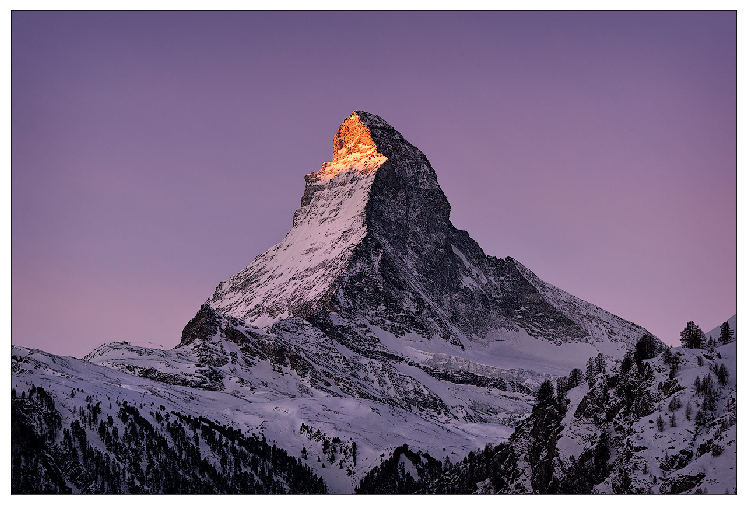

In [165]:
plt.figure(figsize=(13,13))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.xticks([])
plt.yticks([]);

### Now below is my own custom function to perform 2d convolution

In [18]:
def ew_mult(mat,kernal):
    output=[]
    k=kernal.shape[0]
    for a in range(mat.shape[0]-k+1):
        for b in range(mat.shape[1]-k+1):
            output.append((mat[a:a+k,b:b+k]*kernal).sum())
            
    return np.array(output).reshape(mat.shape[0]-k+1,mat.shape[1]-k+1)

In [49]:
def translate(imagetowork2,padshapes=[80,80,80,80]):
    if len(imagetowork2.shape)==3:
        img_shift=np.zeros((imagetowork2.shape[0]+padshapes[0]+padshapes[1],imagetowork2.shape[1]+padshapes[2]+padshapes[3],3))
    else:
        img_shift=np.zeros((imagetowork2.shape[0]+padshapes[0]+padshapes[1],imagetowork2.shape[1]+padshapes[2]+padshapes[3]))

    img_shift[padshapes[0]:imagetowork2.shape[0]+padshapes[0],padshapes[2]:imagetowork2.shape[1]+padshapes[2]]=imagetowork2
    # Do remember to convert dtype to uint8
    img_shift=img_shift.astype('uint8')
    
    return img_shift

### The function below get's the colour from our actual image separately and then perform 2d convolution on each of them and then merge them back and then returns the image with padding

In [20]:
def convolution_3d(X, F, pad = 'type1'):
    """3D-convolution operation with different padding method
    params: 
    X - image
    F - filter
    pad - type of padding
            'type1' - returns the same size of the image with zero borders in results
            'type2' - returns the reduced size image with wherever the operation can be possibe (output shape: (i-f)/2 + 1)
            'type3' - returns the same size of the input image but without zero borders
    returns:
    res - convolved image
    """
    padding=F.shape[0]//2

    if pad=='type3':
        
        X=translate(X,padshapes=[padding,padding,padding,padding])
        
        B=X[:,:,0].reshape(X.shape[0],X.shape[1])
        G=X[:,:,1].reshape(X.shape[0],X.shape[1])
        R=X[:,:,2].reshape(X.shape[0],X.shape[1])
        
        one=ew_mult(B,F)
        two=ew_mult(G,F)
        three=ew_mult(R,F)     
        
        return (cv2.merge([one, two, three])).astype('uint8')
    
    elif pad=='type1':
        
        B=X[:,:,0].reshape(X.shape[0],X.shape[1])
        G=X[:,:,1].reshape(X.shape[0],X.shape[1])
        R=X[:,:,2].reshape(X.shape[0],X.shape[1])
        
        one=ew_mult(B,F)
        two=ew_mult(G,F)
        three=ew_mult(R,F) 
    
        final= (cv2.merge([one, two, three])).astype('uint8')
        return translate(final,padshapes=[padding,padding,padding,padding])

    
    else:
        B=X[:,:,0].reshape(X.shape[0],X.shape[1])
        G=X[:,:,1].reshape(X.shape[0],X.shape[1])
        R=X[:,:,2].reshape(X.shape[0],X.shape[1])
        
        one=ew_mult(B,F)
        two=ew_mult(G,F)
        three=ew_mult(R,F)     
        
        return (cv2.merge([one, two, three])).astype('uint8')

### Let's perform avg filtering on this

In [122]:
ker = (np.ones(9)*(1/9)).reshape(3,3)

In [138]:
out=convolution_3d(img,ker)

### And the resultant image is:

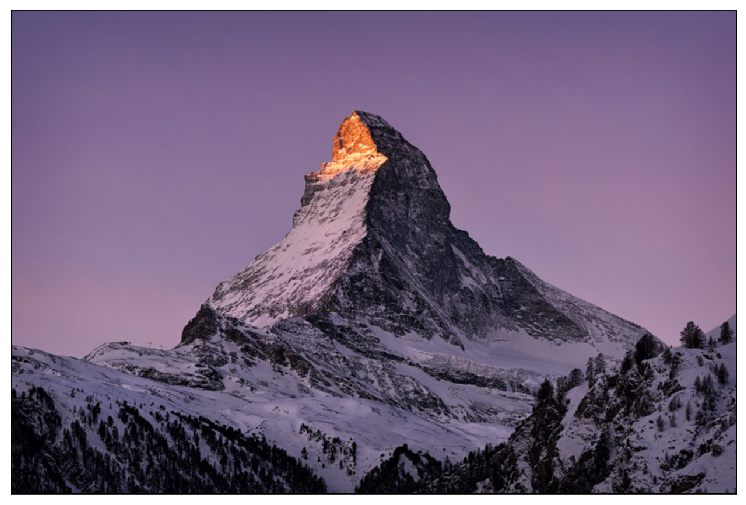

In [139]:
plt.figure(figsize=(13,13))
plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
plt.xticks([])
plt.yticks([]);

**We can also see that our image size will be same as original**

In [133]:
print(img.shape)
print(out.shape)

(831, 1245, 3)
(831, 1245, 3)


### We can confirm padding by seeing first and last column

In [145]:
out[0]

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       ...,
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=uint8)

### So we clearly see that our function works well. For default type1, it gave a blurry image back with black padding

### Let's perform other two types

In [141]:
out2=convolution_3d(img,ker,pad='type3')

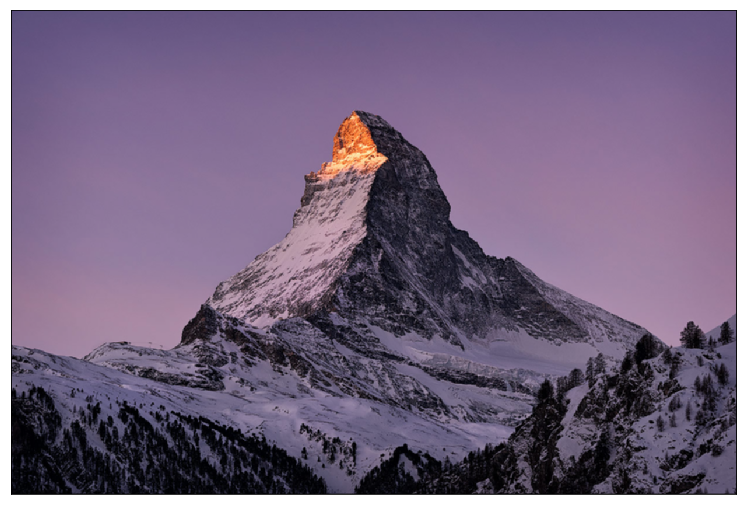

In [142]:
plt.figure(figsize=(13,13))
plt.imshow(cv2.cvtColor(out2, cv2.COLOR_BGR2RGB))
plt.xticks([])
plt.yticks([]);

**And if we see the shape, we get:**

In [136]:
print(img.shape)
print(out2.shape)

(831, 1245, 3)
(831, 1245, 3)


### And clearly there's no black padding in this image

In [147]:
out2[0]

array([[53, 33, 38],
       [80, 49, 57],
       [80, 49, 57],
       ...,
       [86, 56, 67],
       [86, 56, 67],
       [57, 37, 44]], dtype=uint8)

### And now for formality, let's perform type2

In [148]:
out3=convolution_3d(img,ker,pad='type2')

### There's no need to show the actual resultant image, but what's there for our use is to see if the image size has actually reduced:

In [194]:
print(img.shape)
print(out3.shape)

(831, 1245, 3)
(829, 1243, 3)


### And it clearly has

### Now let's try some other filters and see how the output looks like

### This below is a sharpen filter, which sharpens our image, let's see it's output

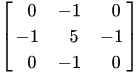

In [178]:
ker=np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])*(1/5)

In [179]:
ker

array([[ 0. , -0.2,  0. ],
       [-0.2,  1. , -0.2],
       [ 0. , -0.2,  0. ]])

In [180]:
out4=convolution_3d(img,ker,pad='type3')

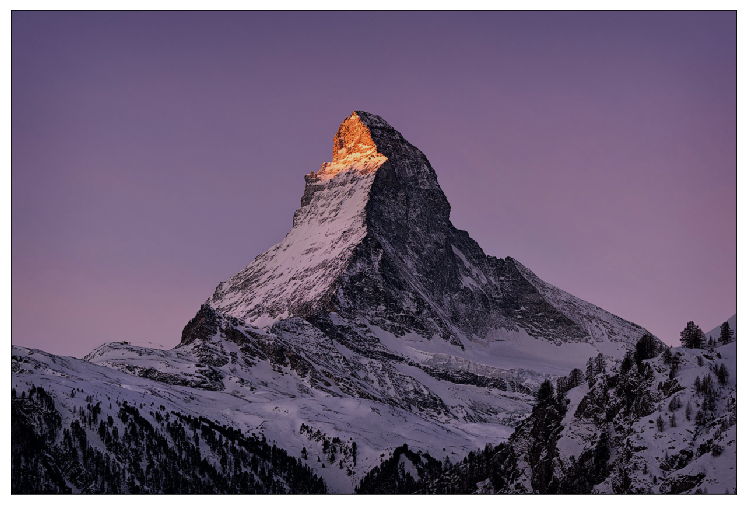

In [175]:
plt.figure(figsize=(13,13))
plt.imshow(cv2.cvtColor(img-out4, cv2.COLOR_BGR2RGB))
plt.xticks([])
plt.yticks([]);

In [193]:
cv2.imwrite('image_sharp7.jpg',img3)

True

In [192]:
img3 = (img+out4)[400:520,600:720,:]

In [182]:
img.shape

(831, 1245, 3)

#### Some Application of Filters
1. Blurring / Smoothing
2. Noise removal
3. Edge detection
4. Sharpening/Image Enhancement
5. CNN --> Which almost solves all the problems in the existing computer vision.

And many more which I'm not acutally aware, hope you'd hunt for it :P

### 3. Bluring: Box or Average Filter

Images typically have the property that the value of a pixel is usually similar to
that of its neighbour. Assume that the image is affected by noise of a form where
we can reasonably expect that this property is preserved. For example, there might
be occasional dead pixels; or small random numbers with zero mean might have
been added to the pixel values. It is natural to attempt to reduce the effects of this
noise by replacing each pixel with a weighted average of its neighbours, a process
often referred to as smoothing or blurring.

This is also called a low pass filter. A low pass filter is a filter that allows low frequencies and
blocks higher frequencies

A simple way to build a low pass filter is by uniformly averaging the values in the
neighborhood of a pixel. 

\begin{equation*}
R_{ij}=\frac{1}{(2k+1)^2}\sum_{u=i-m}^{i+m} \sum_{v=j-m}^{j+m}X_{u,v} 
\\ k \propto Blurinness \ 
\end{equation*}



## Assignment Q2:
### Write a numpy funtion for box filter to deal both GS and Color images, also play with 5 different size of neighbourhood and interpret the results*

In [47]:
def box_filter(image, k):
    """
    inputs:
    image- input image
    k: number neighbors to average with
    returns:
    res - blurred image
    """
    F = ((np.ones(k**2))*(1/k**2)).reshape(k,k)
    if len(image.shape)==3:
        return convolution_3d(image, F, pad = 'type3')
        
    else:
        padding=k//2        
        X=translate(image,padshapes=[padding,padding,padding,padding])
        return ew_mult(X,F)

#### 3.1 Example - Grayscale Image

In [23]:
img = cv2.imread('lion.jpg', 0)

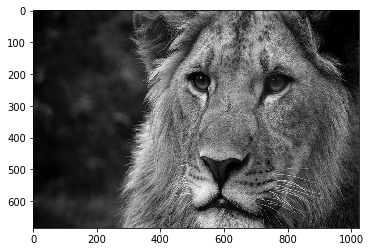

In [24]:
plt.imshow(img, cmap='gray')

In [25]:
kernel5 = np.ones((5,5), np.float32) / 25.0

### We can perform box-filter smoothing using OpenCV's in-built function as shown below:

In [26]:
res = cv2.filter2D(img,-1, kernel5)

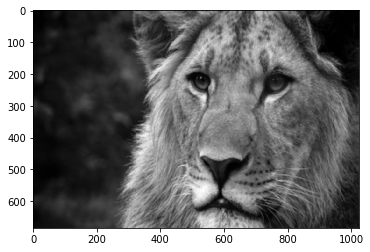

In [27]:
plt.imshow(res, cmap='gray')

### And let's see how our function above works:

In [50]:
res2 = box_filter(img, 5)

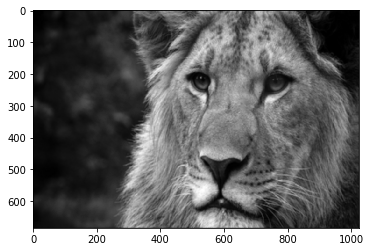

In [51]:
plt.imshow(res2, cmap='gray')

### And we see, the code above works perfectly

### Now let's see it for a colour image

In [53]:
img = cv2.imread('elephants.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

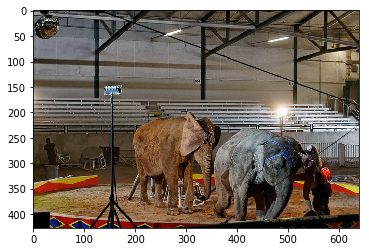

In [54]:
plt.imshow(img)

In [62]:
kernel5 = np.ones((5,5), np.float32) / 25.0

### Let's see the output of OpenCV's function

In [58]:
img_out = cv2.filter2D(img, -1, kernel5)

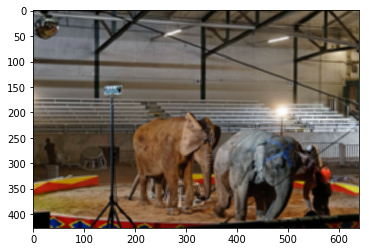

In [59]:
plt.imshow(img_out)

### There's a Box filter function in OpenCV as well

In [60]:
img_out = cv2.blur(img, (5, 5))

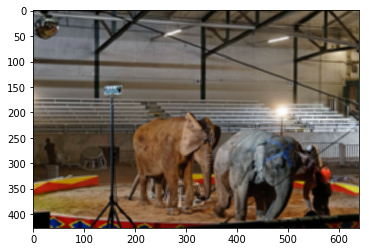

In [61]:
plt.imshow(img_out)

### Now let's see how our function works

In [63]:
res3 = box_filter(img, 5)

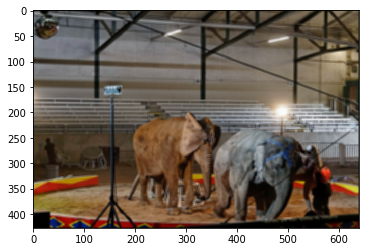

In [64]:
plt.imshow(res3)

### And it works perfectly for colour image as well

### 4. Gaussian Filter

The gaussian filter is similar to the box filter where we're expected to give size of the filter and the values of the filters will be taken from a Gaussian Distribution. However, we can feed the parameter(sigma) for the distribution to control the nature of the filters. By the definition of the gaussian distribution, the current pixel always get high weights than the neighborhood pixels. 

This smoothing kernel forms a weighted average, that weights pixels at its center much more strongly than at its boundaries. One can justify this approach qualitatively: smoothing suppresses noise by enforcing the requirement that pixels should look like their neighbours; and by down-weighting distant neighbours in the average, we can ensure that the requirement that a pixel look like its neighbours is less strongly imposed for distant neighbours. This makes the image blurred/smoothed convinently(Note this in the AQ2).

In applications, a discrete smoothing kernel is obtained by constructing a (2k +1) × (2k + 1) array whose {i, j}th value is

\begin{equation*}
H_{ij}=\frac{1}{2\pi\sigma^2}e^{\left( -\frac{\left( i-k-1 \right)^2 + \left( j-k-1 \right)^2}{2\sigma^2}\right)}\\
\\\text for\  i,j= 1 \dots 2k+1
\end{equation*}



That's great, let's control the randomness for an extent. Calculate the weights for a 3 by 3 kernel.

### Let's create a Gaussian Kernel function

In [85]:
def get_gauss_kernel(k, sigma):
    kernel_shape = 2*k +1
    #print(kernel_shape)
    res = np.zeros((kernel_shape, kernel_shape))
    for i in range(1, kernel_shape+1):
        for j in range(1, kernel_shape+1):
            res[i-1,j-1] = (1/(2*np.pi*pow(sigma,2))) * np.exp(-(pow((i-k-1),2) + pow((j-k-1),2))/(2 * pow(sigma,2)))
    return(res)

In [212]:
kernel = get_gauss_kernel(10, 1)
kernel

array([[5.92068480e-45, 7.90987316e-41, 3.88751981e-37, 7.02880071e-34,
        4.67514798e-31, 1.14397099e-28, 1.02976987e-26, 3.41012947e-25,
        4.15438817e-24, 1.86186760e-23, 3.06970072e-23, 1.86186760e-23,
        4.15438817e-24, 3.41012947e-25, 1.02976987e-26, 1.14397099e-28,
        4.67514798e-31, 7.02880071e-34, 3.88751981e-37, 7.90987316e-41,
        5.92068480e-45],
       [7.90987316e-41, 1.05673745e-36, 5.19362028e-33, 9.39028574e-30,
        6.24586999e-27, 1.52831400e-24, 1.37574442e-22, 4.55583982e-21,
        5.55014911e-20, 2.48740426e-19, 4.10103631e-19, 2.48740426e-19,
        5.55014911e-20, 4.55583982e-21, 1.37574442e-22, 1.52831400e-24,
        6.24586999e-27, 9.39028574e-30, 5.19362028e-33, 1.05673745e-36,
        7.90987316e-41],
       [3.88751981e-37, 5.19362028e-33, 2.55254431e-29, 4.61510838e-26,
        3.06970072e-23, 7.51131001e-21, 6.76146580e-19, 2.23908996e-17,
        2.72776999e-16, 1.22250169e-15, 2.01556455e-15, 1.22250169e-15,
        2.7277

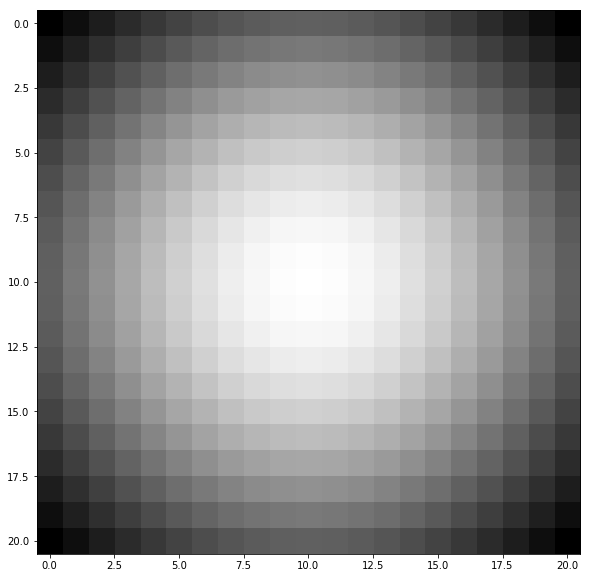

In [211]:
plt.figure(figsize=(10,10))
plt.imshow(kernel, cmap='gray')

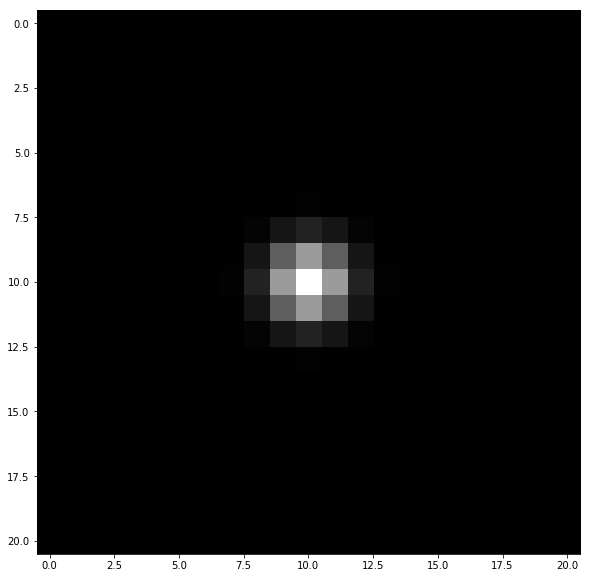

In [213]:
plt.figure(figsize=(10,10))
plt.imshow(kernel, cmap='gray')

### Now let's work on an image

In [117]:
img = cv2.imread('pandagreen3.jpg', cv2.IMREAD_GRAYSCALE)

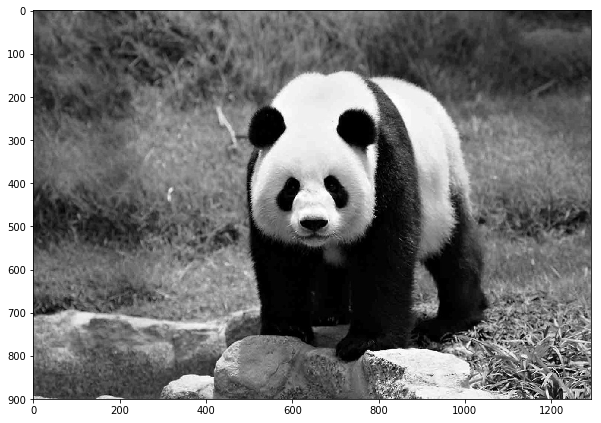

In [119]:
plt.figure(figsize=(10,10))
plt.imshow(img, cmap='gray')

In [121]:
img_out=ew_mult(img,kernel)

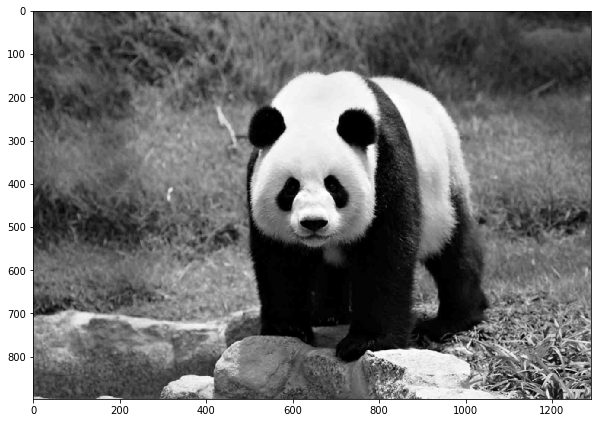

In [122]:
plt.figure(figsize=(10,10))
plt.imshow(img_out, cmap='gray')

## Assignment Q3:
### Write down the effects on results for different values of sigma. Can we choose appropriate value of sigma for a specific image? Give some examples.

### So let's try with different sigma values

In [123]:
k=get_gauss_kernel(1,2)

### Now just to perform convolution, I can just call my ewmult function:

In [124]:
out1=ew_mult(img,k)

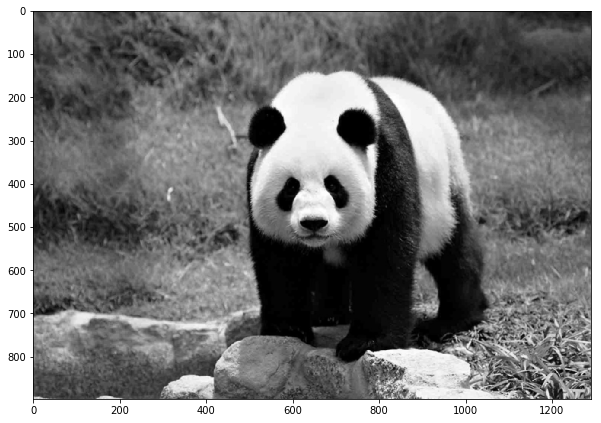

In [125]:
plt.figure(figsize=(10,10))
plt.imshow(out1,cmap='gray')

### Seems similar to sigma as 1

### Let's increase it significantly

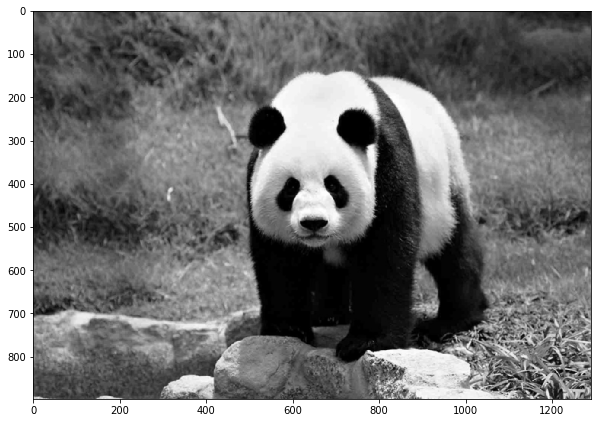

In [131]:
k=get_gauss_kernel(1,5)
out1=ew_mult(img,k)
plt.figure(figsize=(10,10))
plt.imshow(out1,cmap='gray')

In [132]:
k=get_gauss_kernel(1,15)
k

array([[0.00070422, 0.00070579, 0.00070422],
       [0.00070579, 0.00070736, 0.00070579],
       [0.00070422, 0.00070579, 0.00070422]])

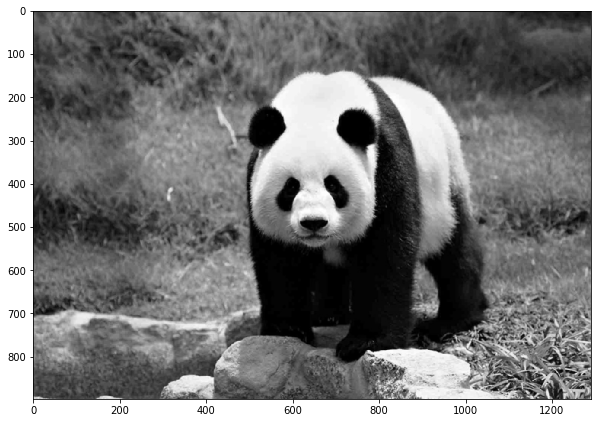

In [133]:
out1=ew_mult(img,k)
plt.figure(figsize=(10,10))
plt.imshow(out1,cmap='gray')

### 5. Median Filter

A median filter is specified by giving some form of neighbourhood shape (which can significantly affect the behaviour of the filter). This neighbourhood is passed over the image as in convolution, but instead of taking a weighted sum of elements within the neighbourhood, we take the median. If we write the neighbourhood centered at i, j as Nij , the filter can be described by:

\begin{equation*}R_{ij} = median\left( x_{uv} \|\ x_{uv} ∈ N_{ij} \right)
\end{equation*}


Median filter is one of the order statistics filter.


## Assignment Q4
### Write a python-numpy function for median filter and produce any real use case where median filters can be used.

In [134]:
def ew_mult_med(mat,kernal):
    output=[]
    k=kernal.shape[0]
    for a in range(mat.shape[0]-k+1):
        for b in range(mat.shape[1]-k+1):
            output.append(np.median((mat[a:a+k,b:b+k]*kernal)))
            
    return np.array(output).reshape(mat.shape[0]-k+1,mat.shape[1]-k+1)

### Let's work with this median convolution

In [143]:
img = cv2.imread('pandagreen3.jpg', cv2.IMREAD_GRAYSCALE)

In [147]:
kernel=(np.ones(25)*(1/25)).reshape(5,5)

In [148]:
out1=ew_mult_med(img,kernel)

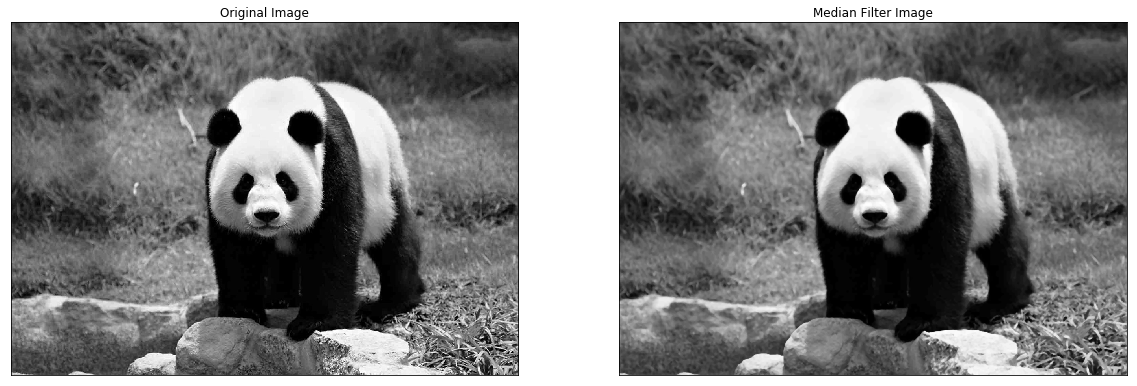

In [155]:
plt.figure(figsize=(20,20))
plt.subplot(121)
plt.imshow(img,cmap='gray')
plt.title('Original Image')
plt.xticks([])
plt.yticks([])

plt.subplot(122)
plt.imshow(out1,cmap='gray')
plt.title('Median Filter Image')
plt.xticks([])
plt.yticks([]);

Real use cases of Median Filter:

- Median filter is used to remove noise from images.
- It is widely used as it is very effective at removing noise while preserving edges.


### Let's perform this on a noisy image

In [156]:
img = cv2.imread('cat.jpg', cv2.IMREAD_GRAYSCALE)

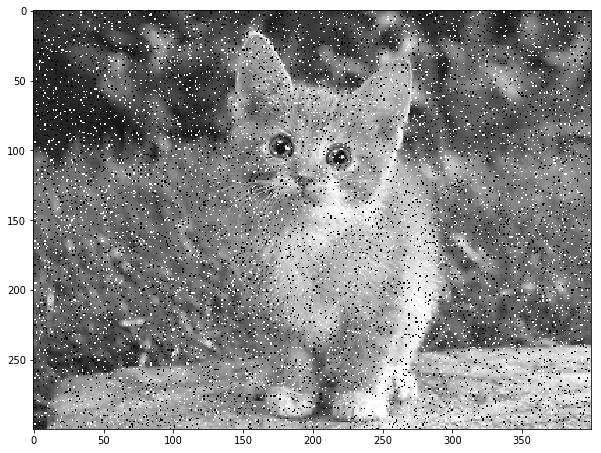

In [158]:
plt.figure(figsize=(10,10))
plt.imshow(img,cmap='gray')

In [162]:
kernel=(np.ones(9)).reshape(3,3)
out1=ew_mult_med(img,kernel)

### Let's see how our output looks like:

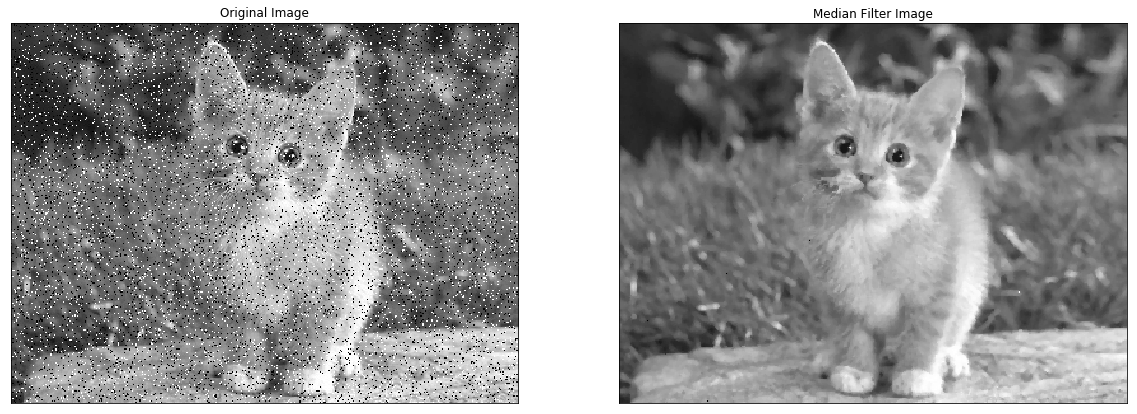

In [163]:
plt.figure(figsize=(20,20))
plt.subplot(121)
plt.imshow(img,cmap='gray')
plt.title('Original Image')
plt.xticks([])
plt.yticks([])

plt.subplot(122)
plt.imshow(out1,cmap='gray')
plt.title('Median Filter Image')
plt.xticks([])
plt.yticks([]);

### What if we work with it's colour form only?

In [2]:
def ew_mult_med(mat,kernal):
    output=[]
    k=kernal.shape[0]
    for a in range(mat.shape[0]-k+1):
        for b in range(mat.shape[1]-k+1):
            output.append(np.median((mat[a:a+k,b:b+k]*kernal)))
            
    return np.array(output).reshape(mat.shape[0]-k+1,mat.shape[1]-k+1)

def translate2(imagetowork2,padshapes=[80,80,80,80]):
    if len(imagetowork2.shape)==3:
        img_shift=np.zeros((imagetowork2.shape[0]+padshapes[0]+padshapes[1],imagetowork2.shape[1]+padshapes[2]+padshapes[3],3))
    else:
        img_shift=np.zeros((imagetowork2.shape[0]+padshapes[0]+padshapes[1],imagetowork2.shape[1]+padshapes[2]+padshapes[3]))

    img_shift[padshapes[0]:imagetowork2.shape[0]+padshapes[0],padshapes[2]:imagetowork2.shape[1]+padshapes[2]]=imagetowork2
    # Do remember to convert dtype to uint8
    img_shift=img_shift.astype('uint8')
    
    return img_shift

### The function below get's the colour from our actual image separately and then perform 2d convolution on each of them and then merge them back and then returns the image with padding

def convolution_colour(X, F, pad = 'type1'):
    """3D-convolution operation with different padding method
    params: 
    X - image
    F - filter
    pad - type of padding
            'type1' - returns the same size of the image with zero borders in results
            'type2' - returns the reduced size image with wherever the operation can be possibe (output shape: (i-f)/2 + 1)
            'type3' - returns the same size of the input image but without zero borders
    returns:
    res - convolved image
    """
    padding=F.shape[0]//2

    if pad=='type3':
        
        X=translate2(X,padshapes=[padding,padding,padding,padding])
        
        B=X[:,:,0].reshape(X.shape[0],X.shape[1])
        G=X[:,:,1].reshape(X.shape[0],X.shape[1])
        R=X[:,:,2].reshape(X.shape[0],X.shape[1])
        
        one=ew_mult_med(B,F)
        two=ew_mult_med(G,F)
        three=ew_mult_med(R,F)     
        
        return (cv2.merge([one, two, three])).astype('uint8')
    
    elif pad=='type1':
        
        B=X[:,:,0].reshape(X.shape[0],X.shape[1])
        G=X[:,:,1].reshape(X.shape[0],X.shape[1])
        R=X[:,:,2].reshape(X.shape[0],X.shape[1])
        
        one=ew_mult_med(B,F)
        two=ew_mult_med(G,F)
        three=ew_mult_med(R,F) 
    
        final= (cv2.merge([one, two, three])).astype('uint8')
        return translate2(final,padshapes=[padding,padding,padding,padding])

    
    else:
        B=X[:,:,0].reshape(X.shape[0],X.shape[1])
        G=X[:,:,1].reshape(X.shape[0],X.shape[1])
        R=X[:,:,2].reshape(X.shape[0],X.shape[1])
        
        one=ew_mult_med(B,F)
        two=ew_mult_med(G,F)
        three=ew_mult_med(R,F)     
        
        return (cv2.merge([one, two, three])).astype('uint8')

### So our image is:

In [191]:
img = cv2.imread('cat.jpg')

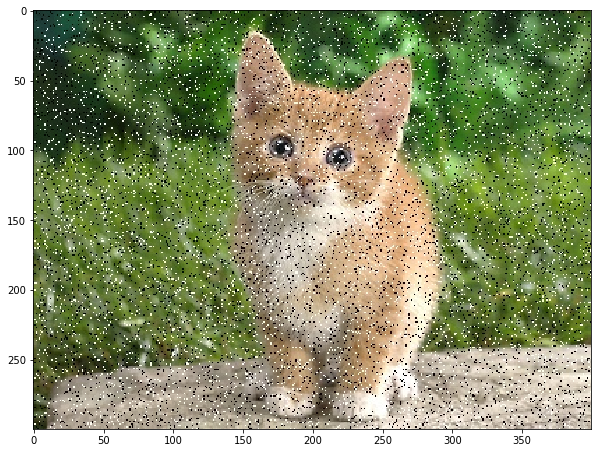

In [172]:
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [194]:
kernel=(np.ones(9)).reshape(3,3)
out1=convolution_colour(img,kernel,'type3')

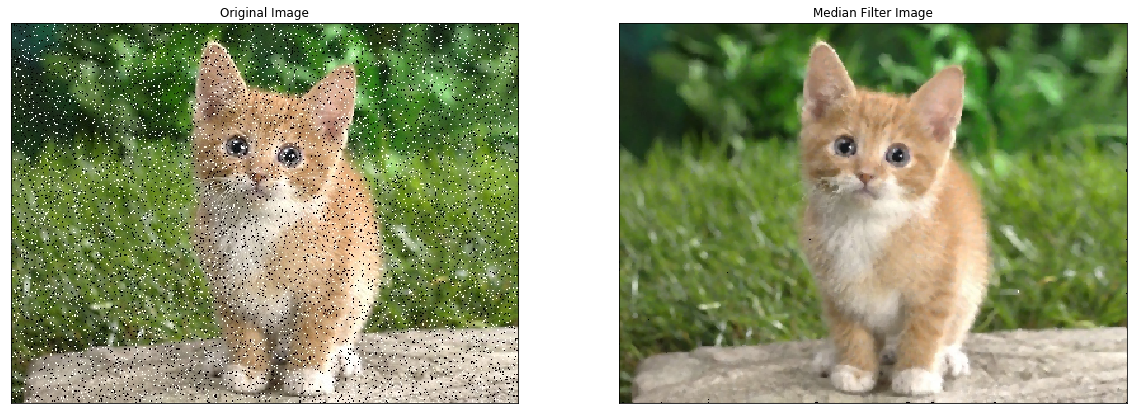

In [195]:
plt.figure(figsize=(20,20))
plt.subplot(121)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.xticks([])
plt.yticks([])

plt.subplot(122)
plt.imshow(cv2.cvtColor(out1,cv2.COLOR_BGR2RGB))
plt.title('Median Filter Image')
plt.xticks([])
plt.yticks([]);

In [7]:
img = cv2.imread('rain.jpg', cv2.IMREAD_GRAYSCALE)


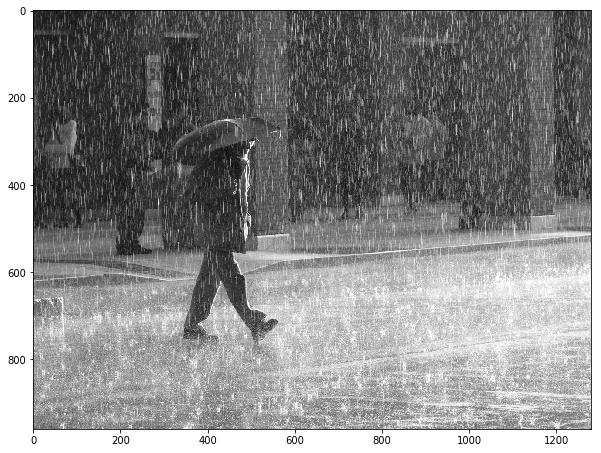

In [9]:
plt.figure(figsize=(10,10))
plt.imshow(img,cmap='gray')

error: OpenCV(3.4.5) c:\projects\opencv-python\opencv\modules\imgproc\src\color.hpp:255: error: (-2:Unspecified error) in function '__cdecl cv::CvtHelper<struct cv::Set<3,4,-1>,struct cv::Set<3,4,-1>,struct cv::Set<0,2,5>,2>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


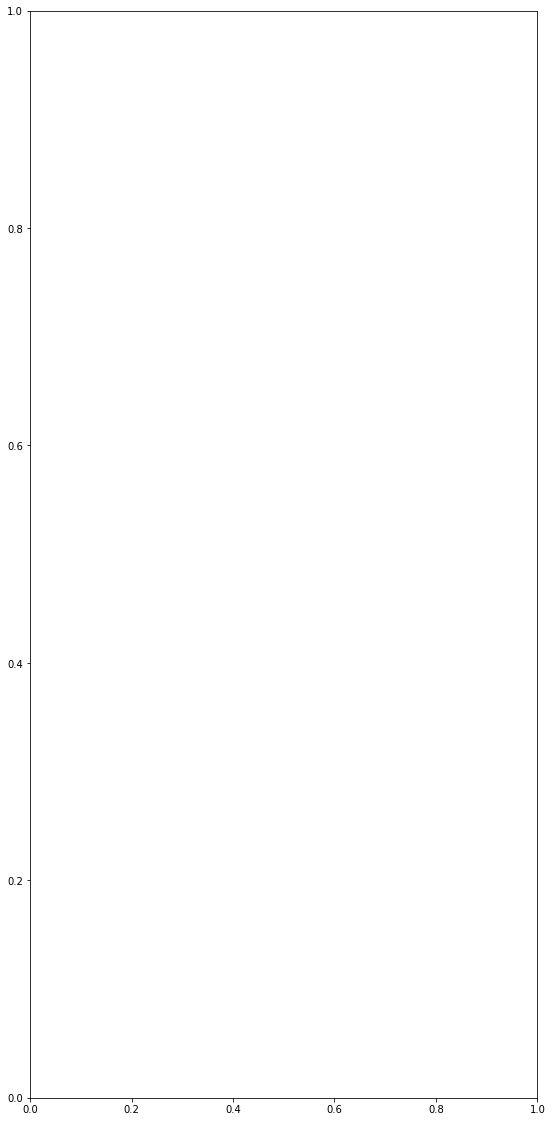

In [10]:
kernel=(np.ones(25)).reshape(5,5)
out1=ew_mult_med(img,kernel)

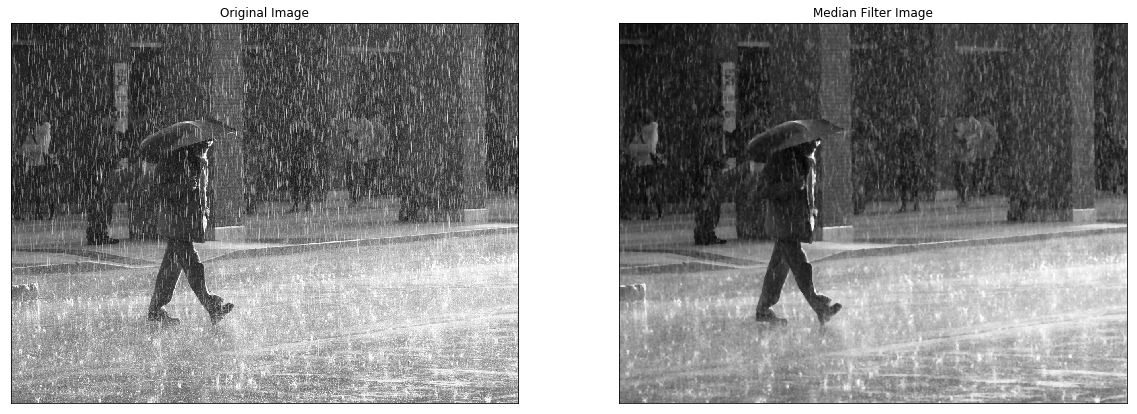

In [11]:
plt.figure(figsize=(20,20))
plt.subplot(121)
plt.imshow(img,cmap='gray')
plt.title('Original Image')
plt.xticks([])
plt.yticks([])

plt.subplot(122)
plt.imshow(out1,cmap='gray')
plt.title('Median Filter Image')
plt.xticks([])
plt.yticks([]);